In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Poblacion: El conjunto completo.
# Muestra: El sub-conjunto, incompleto.

# Tenemos dos cajas: 1,2

In [30]:
data = np.array([1,2,2,1,1,1,1,2,2,1,1,2,2,2,1,2,2,2,1,2])

In [31]:
len(data)

20

(array([ 9., 11.]), array([1. , 1.5, 2. ]), <a list of 2 Patch objects>)

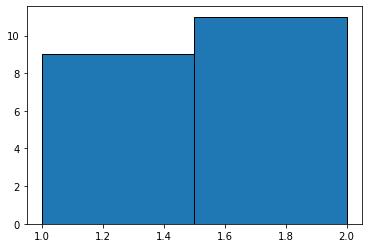

In [32]:
# bins = caja
plt.hist(data, bins=2, ec='k')

# Frecuencia

In [35]:
df = pd.read_csv('../Data/Sesion2/DatosEstratificados.csv')
df

,Salon,Asistentes
0,Salon_A,40
1,Salon_B,100
2,Salon_C,95
3,Salon_D,70
4,Salon_E,510
5,Salon_F,200
6,Salon_G,150
7,Salon_H,125
8,Salon_I,310
9,Salon_J,400


In [37]:
Total = np.sum( df.Asistentes )
print(Total)

2000


In [42]:
asistentes = np.array(df.Asistentes)

In [48]:
#sum_ = 0.
#for i in range(len(asistentes)):
#    print(i)
#    sum_ += asistentes[i]
#print(sum_)

In [50]:
df = df.assign( Porcentaje = df.Asistentes/Total )
df

,Salon,Asistentes,Porcentaje
0,Salon_A,40,0.0200
1,Salon_B,100,0.0500
2,Salon_C,95,0.0475
3,Salon_D,70,0.0350
4,Salon_E,510,0.2550
5,Salon_F,200,0.1000
6,Salon_G,150,0.0750
7,Salon_H,125,0.0625
8,Salon_I,310,0.1550
9,Salon_J,400,0.2000


In [54]:
n = 200
# Agregar una columna con el numero de encuestados en cada salon, es decir, n*Porcentaje

In [55]:
df = df.assign( Encuestados = df.Porcentaje*n )

In [56]:
df

,Salon,Asistentes,Porcentaje,Encuestados
0,Salon_A,40,0.0200,4.0
1,Salon_B,100,0.0500,10.0
2,Salon_C,95,0.0475,9.5
3,Salon_D,70,0.0350,7.0
4,Salon_E,510,0.2550,51.0
5,Salon_F,200,0.1000,20.0
6,Salon_G,150,0.0750,15.0
7,Salon_H,125,0.0625,12.5
8,Salon_I,310,0.1550,31.0
9,Salon_J,400,0.2000,40.0


In [57]:
np.sum( df.Encuestados )

200.0

In [58]:
df.to_excel('NumeroEncuestados.xlsx',sheet_name='Encuesta1',index=False)

# Muestreo sistematico

In [59]:
l = [ 0,-1,-3,-5,5,7,4,10,12,15,20,19,50,55,60,45]

In [61]:
sort_l = np.sort(l)[::-1]
sort_l

array([60, 55, 50, 45, 20, 19, 15, 12, 10,  7,  5,  4,  0, -1, -3, -5])

In [62]:
n = 4
k = int( len(l)/n )
print(k)

4


In [72]:
i0 = np.random.randint(k)
i0

2

In [74]:
S = np.zeros(n)
S[0] = sort_l[i0]
S

array([50.,  0.,  0.,  0.])

In [75]:
for i in range(1,n):
    i0 += k
    S[i] = sort_l[i0]

In [76]:
S

array([50., 15.,  5., -3.])

# Probabilidad - frecuentista

E:= Caiga el numero 3

In [101]:
def GetFrecuencias(N):

    NTimes = 0

    for i in range(int(N)):
        Evento = np.random.randint(1,7)
        #print(Evento)
        if Evento == 3:
            NTimes += 1
            
    return NTimes/N

In [110]:
n = np.logspace(1,6,10)

freq = np.zeros(len(n))

for i in range(len(n)):
    freq[i] = GetFrecuencias(n[i])

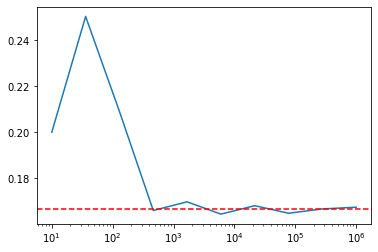

In [112]:
plt.plot(n,freq)
plt.axhline(y=1/6,color='r',ls='--')
plt.xscale('log')